Gracie Abrahams & Eva Wallis

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def generate_barcode(source, nframes, blur, average):
  movie = cv2.VideoCapture(source) # From FrameVis
  height = int(1080)
  width = 1920
  frame_width = int(width / nframes)
  total_frames = movie.get(cv2.CAP_PROP_FRAME_COUNT) # From FrameVis
  print(total_frames)


  frame_interval = total_frames / nframes
  next_frame = frame_interval / 2
  finished_frames = 0
  output_image = None


#From Frame Vis
  while True:
    if finished_frames == nframes:
      break

    movie.set(cv2.CAP_PROP_POS_FRAMES, int(next_frame))
    ret, image = movie.read()

# Our code
    if image is None:
      print("error loading film")
      break

    if blur is True:
      image = cv2.GaussianBlur(image, (11, 11), 0)

    if average is True:
      image = average_func(image)


    image = cv2.resize(image, (frame_width, height))


# From FrameVis
    if output_image is None:
      output_image = image
    else:
      output_image = cv2.hconcat([output_image, image])


    finished_frames += 1
    next_frame += frame_interval

  movie.release()
  return(output_image)

In [ ]:
# From FrameVis
def average_func(image):
  height, width, channel = image.shape
  image = cv2.resize(image, (width, 1))
  image = cv2.resize(image, (width, height))
  return image

In [ ]:
# Our code
def find_timestamp(x_axis, length):
  return(x_axis*length)


#Takes the video and Framevis source code to generate frames
#we added a feature to get multiple images, one frame each
#take the sobel edge detection of each frame to find objects in images
#using built in sobel function
def generate_edge_detection(source, nframes, figure_size):
    movie = cv2.VideoCapture(source)
    height = int(1080)
    width = 1920
    total_frames = int(movie.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_interval = total_frames / nframes
    next_frame = frame_interval / 2
    finished_frames = 0

    while True:
        if finished_frames == nframes:
            break

        movie.set(cv2.CAP_PROP_POS_FRAMES, int(next_frame))
        ret, image = movie.read()

        original_frame = cv2.blur(image, (11, 11))
        original_frame = cv2.resize(original_frame, (width, height))

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(original_frame, cv2.COLOR_BGR2GRAY)

        # Perform Sobel edge detection on each channel
        sobel_x = cv2.Sobel(gray_frame, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray_frame, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate the magnitude and normalize
        sobel_edges = cv2.magnitude(sobel_x, sobel_y)
        sobel_edges = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Display the original and Sobel edge-detected frames side by side
        plt.figure(figsize=figure_size)

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Original Frame {finished_frames + 1}", fontsize=14)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(sobel_edges, cmap='gray')
        plt.title(f"Sobel Edge Detection {finished_frames + 1}", fontsize=14)
        plt.axis('off')

        plt.show()

        finished_frames += 1
        next_frame += frame_interval

    movie.release()


#Two functions we made that allow us to convert between seconds, minutes, percentages
#as represented on the x axis of the generate_barcode plots
def timestamp_to_minutes(timestamp):
    minutes, seconds = map(int, timestamp.split(':'))
    total_minutes = minutes + seconds / 60
    return total_minutes

def print_timestamp(source, timestamp_minutes):
    movie = cv2.VideoCapture(source)

    # Get frames per second and total number of frames
    fps = movie.get(cv2.CAP_PROP_FPS)
    total_frames = int(movie.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the frame number corresponding to the timestamp in minutes
    target_frame = int(timestamp_minutes * 60 * fps)

    # Check if the target frame is within the valid range
    if target_frame >= 0 and target_frame < total_frames:
        # Set the video capture to the target frame
        movie.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
        ret, frame = movie.read()

        # Display the frame
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame at Timestamp {timestamp_minutes} minutes")
        plt.axis('off')
        plt.show()
    else:
        print(f"Invalid timestamp. The video duration is {total_frames / fps / 60} minutes.")

    movie.release()

108280.0
--- 271.81533098220825 seconds ---


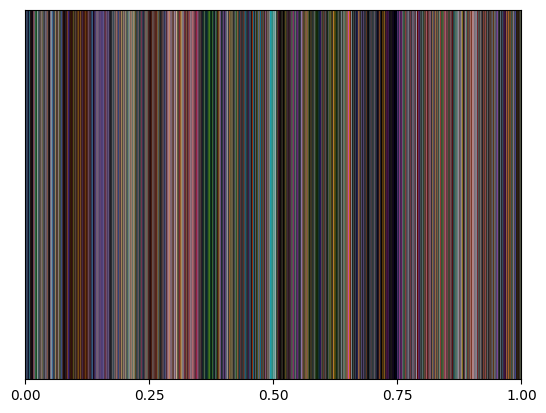

In [ ]:
# Our code
import time
start_time = time.time()
alice = "/content/Alice.in.Wonderland.1951.1080p.BluRay.x265-RARBG.mp4"
grateful = "/content/Grateful Dead - Ripple (Official Music Video).mp4"

image = generate_barcode(alice, 300, False, True)

fig, ax = plt.subplots()

ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB,), extent=[0, 1, 0, 1], aspect='auto')
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(())




print("--- %s seconds ---" % (time.time() - start_time))


Testing on Grateful Dead, "Ripple"




7916.0


[]

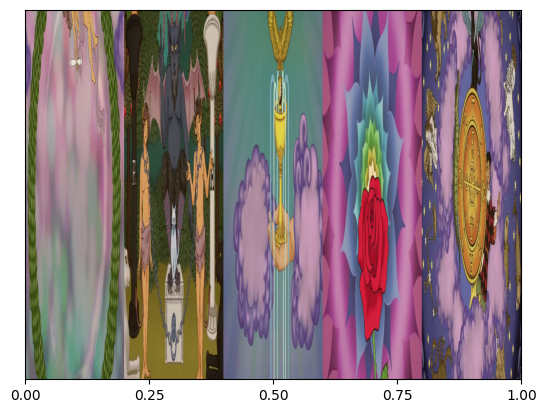

In [ ]:
ripple = "/content/sample_data/Grateful Dead - Ripple (Official Music Video).mp4"

ripple_image = generate_barcode(ripple, 5, False, False)


fig, ax = plt.subplots()

ax.imshow(cv2.cvtColor(ripple_image, cv2.COLOR_BGR2RGB,), extent=[0, 1, 0, 1], aspect='auto')
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(())

7916.0


[]

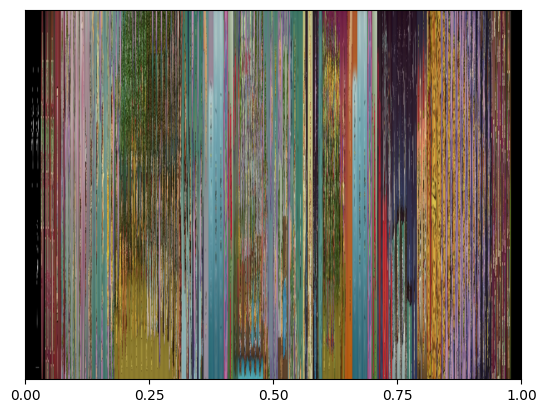

In [ ]:
ripple = "/content/sample_data/Grateful Dead - Ripple (Official Music Video).mp4"

ripple_image = generate_barcode(ripple, 100, False, False)


fig, ax = plt.subplots()

ax.imshow(cv2.cvtColor(ripple_image, cv2.COLOR_BGR2RGB,), extent=[0, 1, 0, 1], aspect='auto')
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(())

In [ ]:
find_timestamp(.5, 4.24)

2.12

In [ ]:
timestamp_to_minutes("2:12")

2.2

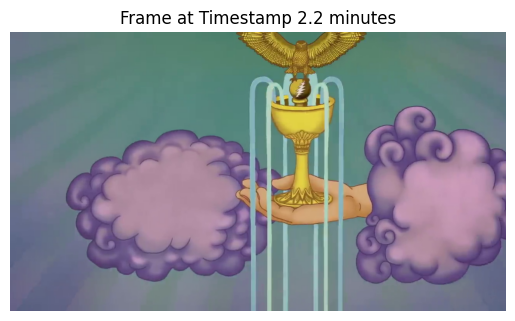

In [ ]:
print_timestamp(ripple,2.2)

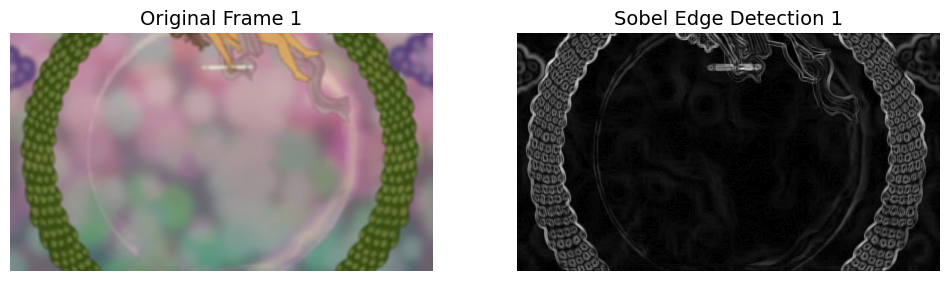

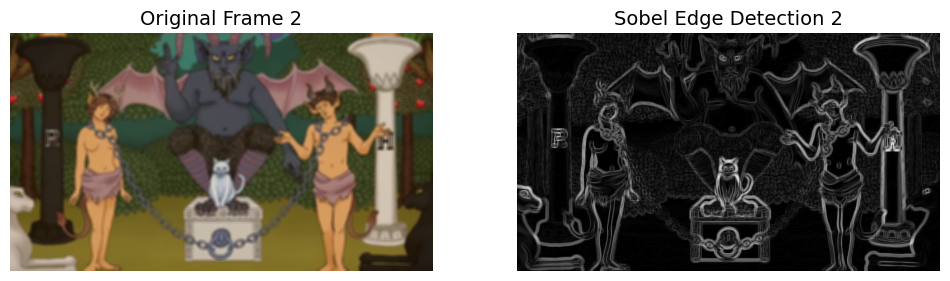

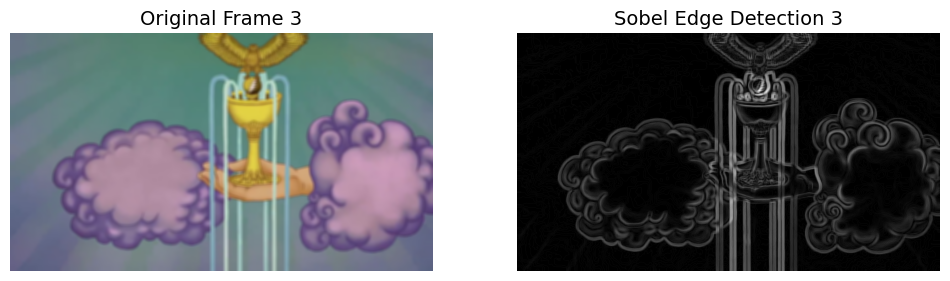

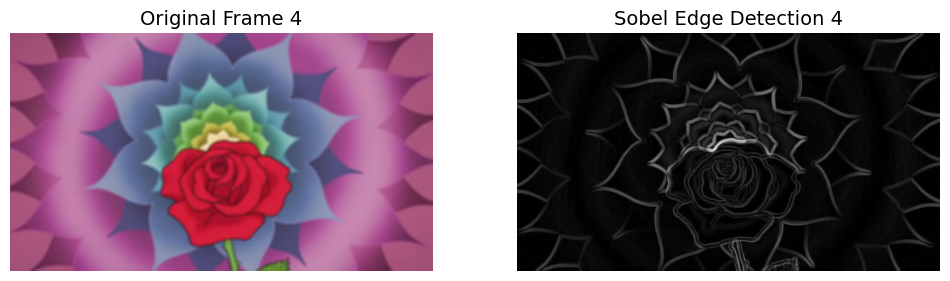

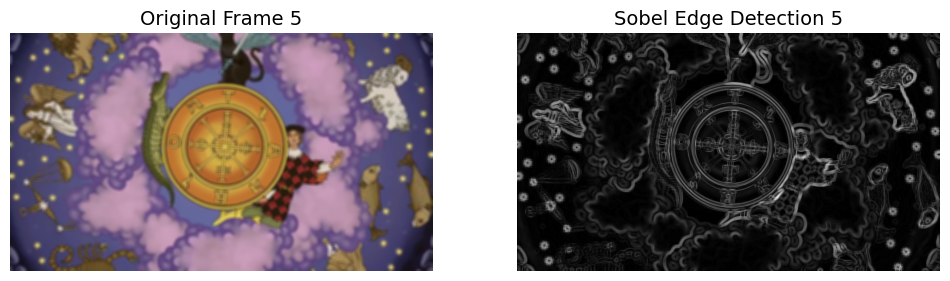

In [ ]:
num_frames = 5
figure_size = (12, 6)
generate_edge_detection(ripple, num_frames, figure_size)

Testing on The Beatles, "Help!" (B&W)

3336.0


[]

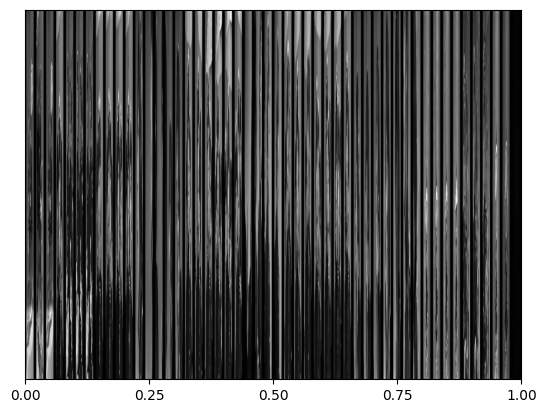

In [ ]:
beatles = "/content/sample_data/The Beatles - Help!.mp4"

beatles_image = generate_barcode(beatles, 50, False, False)


fig, ax = plt.subplots()

ax.imshow(cv2.cvtColor(beatles_image, cv2.COLOR_BGR2RGB,), extent=[0, 1, 0, 1], aspect='auto')
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(())

In [ ]:
find_timestamp(0.25, 219)

54.75

In [ ]:
timestamp_to_minutes("0:54")

0.9

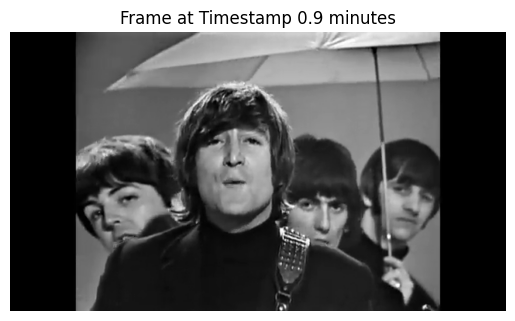

In [ ]:
print_timestamp(beatles,0.9)

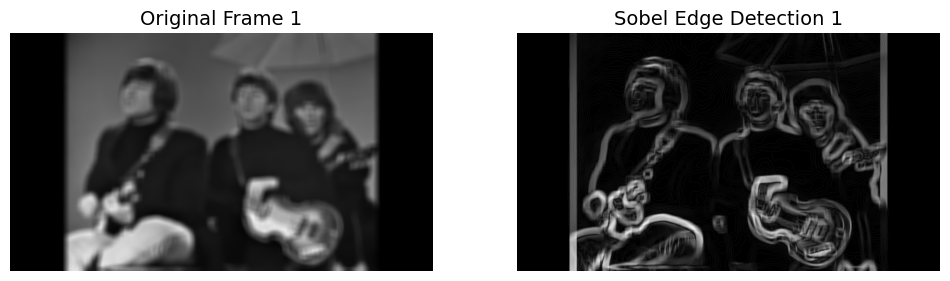

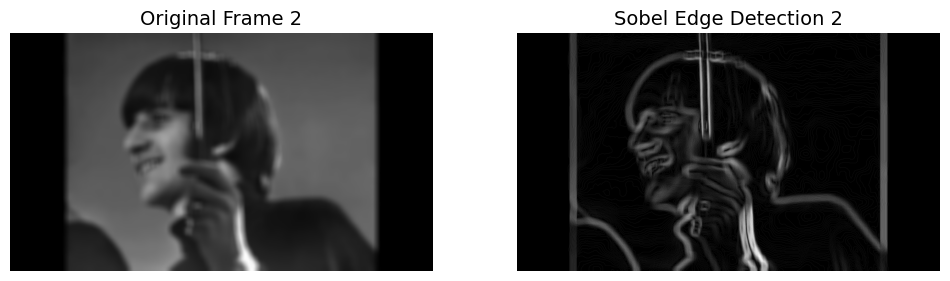

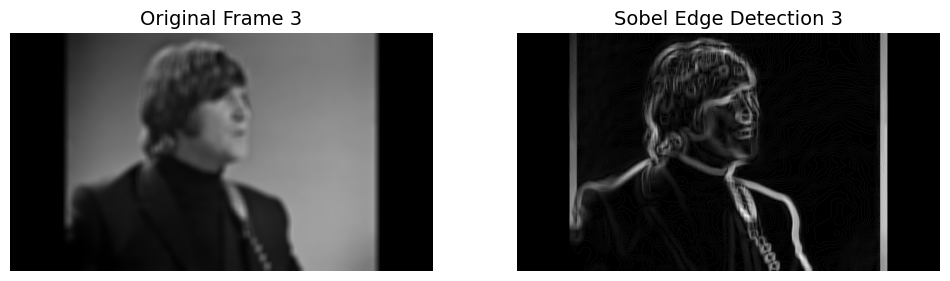

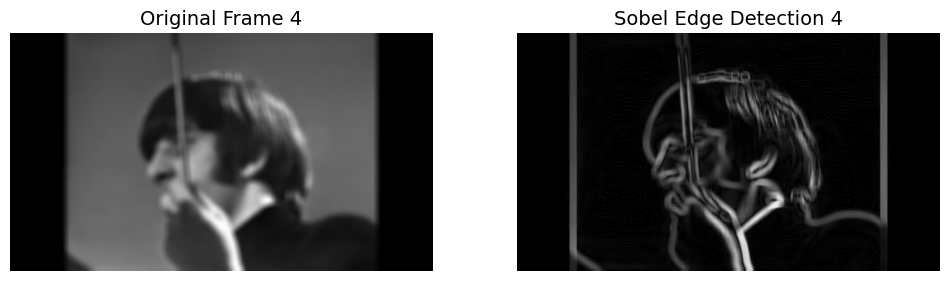

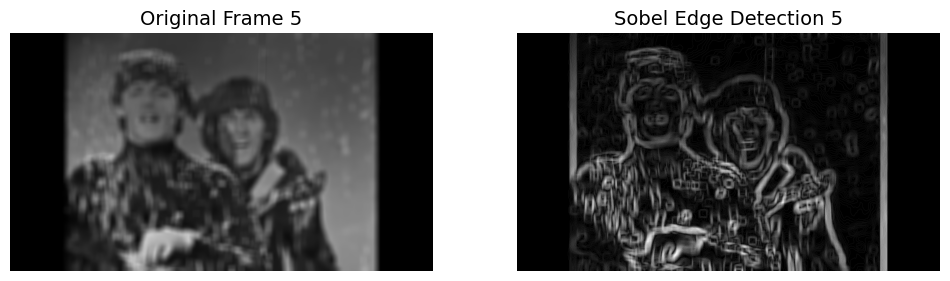

In [ ]:
num_frames = 5
figure_size = (12, 6)
generate_edge_detection(beatles, num_frames, figure_size)